In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('USA_Housing.csv')

In [3]:
df.drop(columns=['Address'], inplace = True)

In [4]:
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05
...,...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,22837.36103,1.060194e+06
4996,78491.27543,6.999135,6.576763,4.02,25616.11549,1.482618e+06
4997,63390.68689,7.250591,4.805081,2.13,33266.14549,1.030730e+06
4998,68001.33124,5.534388,7.130144,5.44,42625.62016,1.198657e+06


In [5]:
standarized_df = df.copy()

In [6]:
standarized_df.iloc[:,0] = preprocessing.normalize([standarized_df.iloc[:,0]])[0]
standarized_df.iloc[:,1] = preprocessing.normalize([standarized_df.iloc[:,1]])[0]
standarized_df.iloc[:,2] = preprocessing.normalize([standarized_df.iloc[:,2]])[0]
standarized_df.iloc[:,3] = preprocessing.normalize([standarized_df.iloc[:,3]])[0]
standarized_df.iloc[:,4] = preprocessing.normalize([standarized_df.iloc[:,4]])[0]

In [7]:
standarized_df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,0.016208,0.013264,0.014041,0.013877,0.008706,1.059034e+06
1,0.016148,0.014011,0.013483,0.010484,0.015150,1.505891e+06
2,0.012488,0.013692,0.017053,0.017405,0.013909,1.058988e+06
3,0.012907,0.016778,0.011191,0.011061,0.012939,1.260617e+06
4,0.012222,0.011765,0.015704,0.014352,0.009939,6.309435e+05
...,...,...,...,...,...,...
4995,0.012341,0.018277,0.012294,0.011739,0.008612,1.060194e+06
4996,0.015993,0.016337,0.013175,0.013639,0.009660,1.482618e+06
4997,0.012916,0.016924,0.009626,0.007227,0.012545,1.030730e+06
4998,0.013856,0.012918,0.014283,0.018457,0.016075,1.198657e+06


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    standarized_df.iloc[:,:-1], standarized_df.Price, test_size=0.33, random_state=42)
m = len(X_train)

In [9]:
def MSE(X, y, weights):
    predictions = X.dot(weights)
    subtraction = np.subtract(predictions, y)
    squaredErrors = np.square(subtraction)
    MSE = 1 / (2 * m) * np.sum(squaredErrors)
    return MSE

In [10]:
def gradient_descent(X, y, weights, learning_rate, iterations):
    errorPerIteration = np.zeros(iterations)
    
    for i in range(iterations):
        predictions = X.dot(weights)
        errors = np.subtract(predictions, y)
        sum_delta = (learning_rate / m) * X.transpose().dot(errors)
        weights = weights - sum_delta
        errorPerIteration[i] = MSE(X, y, weights) 
        
    return weights, errorPerIteration

In [11]:
weights = np.zeros(5)
iterations = 90000
learning_rate = 0.15
weights, errorPerIteration = gradient_descent(X_train, y_train, weights, learning_rate, iterations)

In [12]:
def plot(fig, ax, X, Y, xLabel, yLabel):
    ax.scatter(X, Y)
    ax.set_xlabel(xLabel)
    ax.set_ylabel(yLabel)
    plt.show()

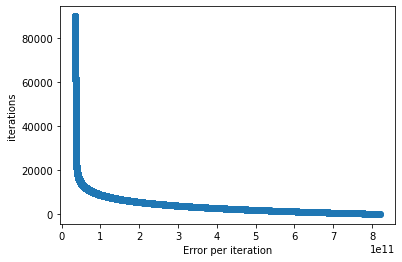

In [13]:
fig, ax = plt.subplots()
plot(fig, ax, errorPerIteration, np.arange(iterations), "Error per iteration", "iterations")

In [14]:
def predict(X):
    return X.dot(weights)

In [15]:
prediction = predict(X_test)
error = MSE(X_test, y_test, weights)

In [16]:
print("MSE: ", error)
print("---------------------------\n weights:")
print(weights)

MSE:  16740468404.548805
---------------------------
 weights:
Avg. Area Income                2.079405e+07
Avg. Area House Age             1.909157e+07
Avg. Area Number of Rooms       1.691337e+07
Avg. Area Number of Bedrooms    1.411948e+07
Area Population                 1.913457e+07
dtype: float64
